# Cap 13 Exemplos de análises de dados

## 13.1 Dados de 1.USA.gov da Bitly

In [1]:
path = "datasets/bitly_usagov/example.txt"


In [2]:
with open(path) as f:
    print(f.readline())


{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [3]:
import json

with open(path) as f:
    records = [json.loads(line) for line in f]


In [4]:
records[0]


{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

### Contagem de fusos horários em Python puro

In [6]:
# Utilizando list comprehension
time_zones = [rec["tz"] for rec in records]


KeyError: 'tz'

In [7]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]


In [8]:
time_zones[:10]


['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [9]:
# Utilizando Python
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1

    return counts


In [10]:
# Utilizando defaultdict
from collections import defaultdict


def get_counts2(sequence):
    counts = defaultdict(int)  # os valores serão inicializados com 0
    for x in sequence:
        counts[x] = 1

    return counts


In [11]:
counts = get_counts(time_zones)


In [12]:
counts["America/New_York"]


1251

In [13]:
len(time_zones)


3440

In [14]:
# Criando uma lista de tuplas (count, timezone) com os dez fuso horários principais e
# suas contagens
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-10:]


In [15]:
top_counts(counts)


[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [16]:
# Utilizando Counter
from collections import Counter

counts = Counter(time_zones)
counts.most_common(10)


[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### Contagem de fusos horários com o pandas

In [17]:
import pandas as pd
import numpy as np

frame = pd.DataFrame(records)


In [18]:
frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [19]:
frame["tz"].head()


0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [20]:
tz_counts = frame["tz"].value_counts()


In [21]:
tz_counts.head()


tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [22]:
clean_tz = frame["tz"].fillna("Missing")


In [23]:
clean_tz[clean_tz == ""] = "Unknown"


In [24]:
tz_counts = clean_tz.value_counts()


In [25]:
tz_counts.head()


tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

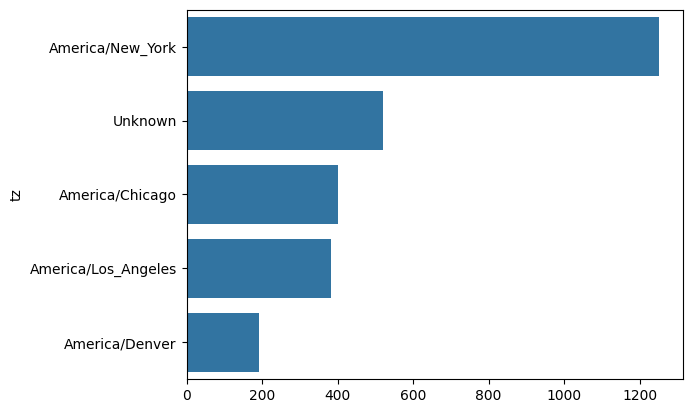

In [26]:
import seaborn as sns

subset = tz_counts.head()

sns.barplot(y=subset.index, x=subset.to_numpy());


In [27]:
frame["a"][1]


'GoogleMaps/RochesterNY'

In [28]:
frame["a"][50]


'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [29]:
frame["a"][51][:50]  # linha longa


'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [30]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])


In [31]:
results.head(5)


0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [32]:
results.value_counts().head(8)


Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

In [33]:
# Decompondo os principais fusos horários em usuários ou não do Windows
cframe = frame[frame["a"].notna()].copy()


In [34]:
cframe["os"] = np.where(
    cframe["a"].str.contains("Windows"), "Windows", "Not Windows"
)


In [35]:
cframe["os"].head()


0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [36]:
by_tz_os = cframe.groupby(["tz", "os"])


In [37]:
agg_counts = by_tz_os.size().unstack().fillna(0)


In [38]:
agg_counts.head()


os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [39]:
indexer = agg_counts.sum("columns").argsort()


In [40]:
indexer.values[:10]


array([ 2,  7,  5,  4, 14, 11,  9,  8, 24, 26])

In [41]:
count_subset = agg_counts.take(indexer[-10:])


In [42]:
count_subset


os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [43]:
agg_counts.sum(axis="columns").nlargest(10)


tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [44]:
count_subset = count_subset.stack()


In [45]:
count_subset.name = "total"


In [46]:
count_subset = count_subset.reset_index()


In [47]:
count_subset.head(10)


,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


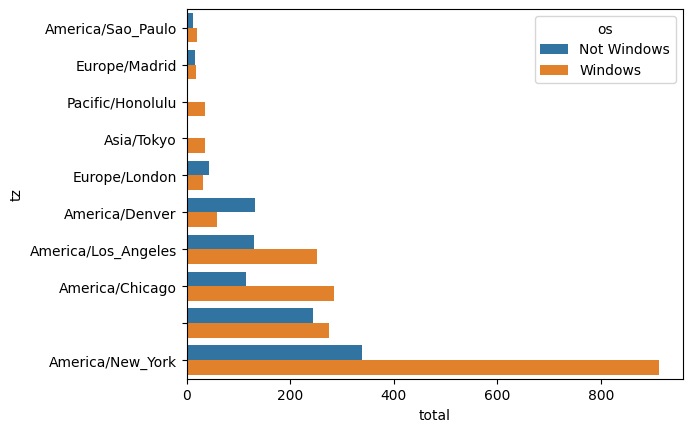

In [48]:
sns.barplot(x="total", y="tz", hue="os", data=count_subset);


In [49]:
# Normalizando os percentuais dos grupos para que a soma seja 1 para melhorar
# a visualização no gráfico
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group


results = count_subset.groupby("tz").apply(norm_total)


C:\Users\derek\AppData\Local\Temp\ipykernel_16024\2298225549.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset.groupby("tz").apply(norm_total)


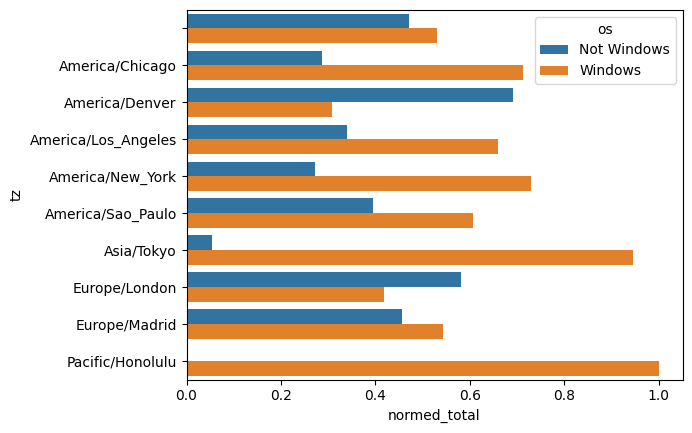

In [50]:
sns.barplot(x="normed_total", y="tz", hue="os", data=results);


In [51]:
# Calculando a soma normalizada de maneira mais eficiente
g = count_subset.groupby("tz")


In [52]:
results2 = count_subset["total"] / g["total"].transform("sum")


## 13.2 Conjunto de dados MovieLens 1M

In [53]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table(
    "datasets/movielens/users.dat",
    sep="::",
    header=None,
    names=unames,
    engine="python",
)

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table(
    "datasets/movielens/ratings.dat",
    sep="::",
    header=None,
    names=rnames,
    engine="python",
)

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table(
    "datasets/movielens/movies.dat",
    sep="::",
    header=None,
    names=mnames,
    engine="python",
)


In [54]:
users.head()


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [55]:
ratings.head()


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [56]:
movies.head()


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [57]:
ratings


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [58]:
data = pd.merge(pd.merge(ratings, users), movies)


In [59]:
data


,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [60]:
data.iloc[0]


user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [61]:
# Obtendo as avaliações médias de cada filme agrupadas por identidade de gênero
mean_ratings = data.pivot_table(
    "rating", index="title", columns="gender", aggfunc="mean"
)


In [62]:
mean_ratings.head()


gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [63]:
ratings_by_title = data.groupby("title").size()


In [64]:
ratings_by_title.head()


title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [65]:
active_titles = ratings_by_title.index[
    ratings_by_title >= 250
]  # Títulos que receberam pelo menos 250 avaliações


In [66]:
active_titles


Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [67]:
mean_ratings = mean_ratings.loc[active_titles]


In [68]:
mean_ratings


gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [69]:
# Para saber quais são os filmes prediletos do gênero feminino, pode-se colocar
# a lista em ordem descrescente de acordo com a coluna F
top_female_ratings = mean_ratings.sort_values("F", ascending=False)


In [70]:
top_female_ratings.head()


gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


### Medição da discrepância nas avaliações

In [71]:
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]


In [72]:
sorted_by_diff = mean_ratings.sort_values("diff")


In [73]:
sorted_by_diff.head()


gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [74]:
sorted_by_diff[::-1].head()


gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


In [75]:
rating_std_by_title = data.groupby("title")["rating"].std()


In [76]:
rating_std_by_title = rating_std_by_title.loc[active_titles]


In [77]:
rating_std_by_title.head()


title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

In [78]:
rating_std_by_title.sort_values(ascending=False)[:10]


title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [79]:
movies["genres"].head()


0     Animation|Children's|Comedy
1    Adventure|Children's|Fantasy
2                  Comedy|Romance
3                    Comedy|Drama
4                          Comedy
Name: genres, dtype: object

In [80]:
movies["genres"].head().str.split("|")


0     [Animation, Children's, Comedy]
1    [Adventure, Children's, Fantasy]
2                   [Comedy, Romance]
3                     [Comedy, Drama]
4                            [Comedy]
Name: genres, dtype: object

In [81]:
movies["genre"] = movies.pop("genres").str.split("|")


In [82]:
movies.head()


,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [83]:
# Método explode()
movies_exploded = movies.explode("genre")


In [84]:
movies_exploded[:10]


,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


In [85]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)


In [86]:
ratings_with_genre.iloc[0]


movie_id                     1
title         Toy Story (1995)
genre                Animation
user_id                      1
rating                       5
timestamp            978824268
gender                       F
age                          1
occupation                  10
zip                      48067
Name: 0, dtype: object

In [87]:
genre_ratings = (
    ratings_with_genre.groupby(["genre", "age"])["rating"].mean().unstack("age")
)


In [88]:
genre_ratings[:10]


age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


## 13.3 Nomes de bebês americanos de 1880 a 2010

In [89]:
names_1880 = pd.read_csv(
    "datasets/babynames/yob1880.txt", names=["name", "sex", "births"]
)


In [90]:
names_1880


,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [91]:
names_1880.groupby("sex")["births"].sum()


sex
F     90993
M    110493
Name: births, dtype: int64

In [92]:
pieces = []
for year in range(1880, 2011):
    path = f"datasets/babynames/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])

    # Adiciona uma coluna para o ano
    frame["year"] = year
    pieces.append(frame)

# Concatena tudo em um único DataFrame
names = pd.concat(pieces, ignore_index=True)


In [93]:
names


,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [94]:
total_births = names.pivot_table(
    "births", index="year", columns="sex", aggfunc=sum
)


C:\Users\derek\AppData\Local\Temp\ipykernel_16024\2125185781.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = names.pivot_table(


In [95]:
total_births.tail()


sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


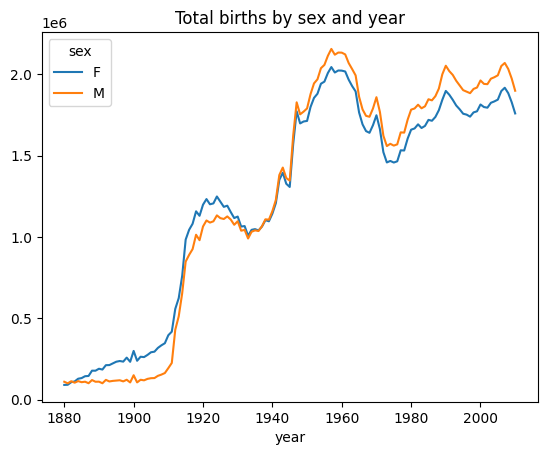

In [96]:
total_births.plot(title="Total births by sex and year");


In [97]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group


names = names.groupby(["year", "sex"]).apply(add_prop)


C:\Users\derek\AppData\Local\Temp\ipykernel_16024\1410174031.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(["year", "sex"]).apply(add_prop)


In [98]:
names


name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1690779    Zymaire   M       5  2010  0.000003
         1690780     Zyonne   M       5  2010  0.000003
         1690781  Zyquarius   M       5  2010  0.000003
         1690782      Zyran   M       5  2010  0.000003
         1690783      Zzyzx   M       5  2010  0.000003

[1690784 rows x 5 columns]

In [99]:
names.groupby(level=["year", "sex"])["prop"].sum()


year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [100]:
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]


In [101]:
grouped = names.groupby(level=["year", "sex"])


In [102]:
top1000 = grouped.apply(get_top1000)


In [103]:
top1000.head()


name sex  births  year      prop
year sex year sex                                         
1880 F   1880 F   0       Mary   F    7065  1880  0.077643
                  1       Anna   F    2604  1880  0.028618
                  2       Emma   F    2003  1880  0.022013
                  3  Elizabeth   F    1939  1880  0.021309
                  4     Minnie   F    1746  1880  0.019188

In [104]:
top1000 = top1000.reset_index(drop=True)


In [105]:
top1000.head()


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


### Análise das tendências para os nomes

In [106]:
boys = top1000[top1000["sex"] == "M"]


In [107]:
girls = top1000[top1000["sex"] == "F"]


In [108]:
total_births = top1000.pivot_table(
    "births", index="year", columns="name", aggfunc=sum
)


C:\Users\derek\AppData\Local\Temp\ipykernel_16024\2180777578.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = top1000.pivot_table(


In [109]:
total_births.info()


<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1880 to 2010
Columns: 6862 entries, Aaden to Zuri
dtypes: float64(6862)
memory usage: 6.9 MB


In [110]:
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]


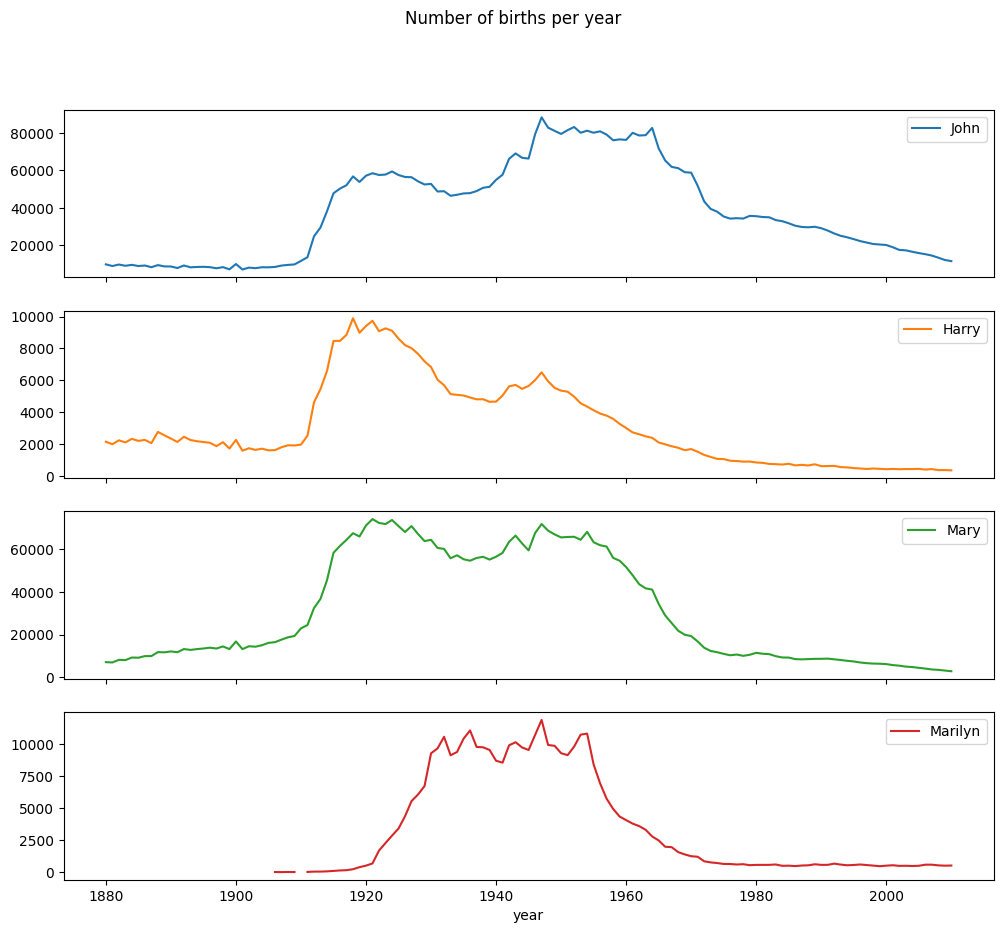

In [111]:
subset.plot(subplots=True, figsize=(12, 10), title="Number of births per year");


#### Medição do aumento na diversidade dos nomes

In [112]:
table = top1000.pivot_table("prop", index="year", columns="sex", aggfunc=sum)


C:\Users\derek\AppData\Local\Temp\ipykernel_16024\2178689741.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = top1000.pivot_table("prop", index="year", columns="sex", aggfunc=sum)


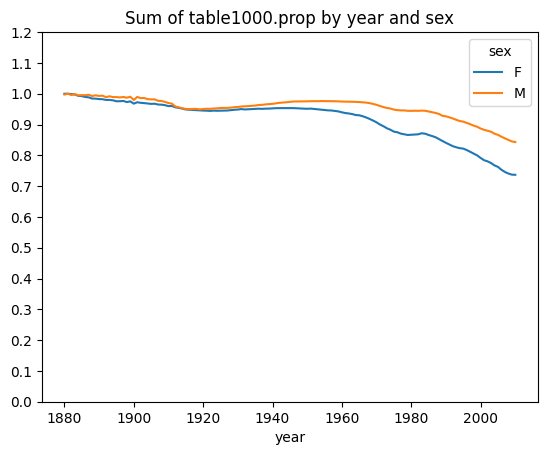

In [113]:
table.plot(
    title="Sum of table1000.prop by year and sex",
    yticks=np.linspace(0, 1.2, 13),
);


In [114]:
df = boys[boys["year"] == 2010]


In [115]:
df


,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [116]:
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()


In [117]:
prop_cumsum[:10]


260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [118]:
prop_cumsum.searchsorted(0.5)


np.int64(116)

In [119]:
df = boys[boys.year == 1900]


In [120]:
in1900 = df.sort_values("prop",ascending=False).prop.cumsum()


In [121]:
in1900.searchsorted(0.5) + 1


np.int64(25)

In [122]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1


diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()


C:\Users\derek\AppData\Local\Temp\ipykernel_16024\1799700913.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)


In [123]:
diversity.head()


sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


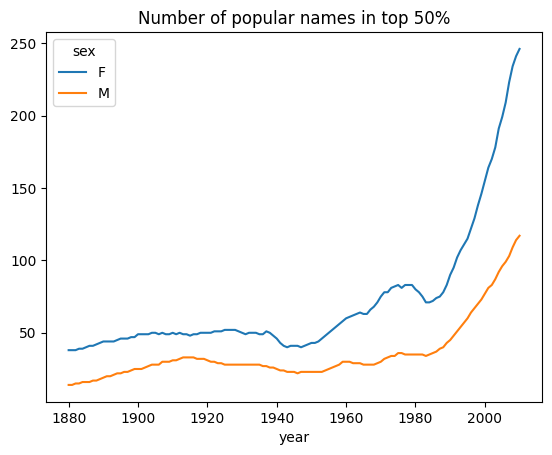

In [124]:
diversity.plot(title="Number of popular names in top 50%");


#### A revolução da "última letra"

In [125]:
names


name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1690779    Zymaire   M       5  2010  0.000003
         1690780     Zyonne   M       5  2010  0.000003
         1690781  Zyquarius   M       5  2010  0.000003
         1690782      Zyran   M       5  2010  0.000003
         1690783      Zzyzx   M       5  2010  0.000003

[1690784 rows x 5 columns]

In [126]:
def get_last_letter(name):
    return name[-1]


names_reset = names.reset_index(drop=True)  # evitar erro de ambiguidade
last_letters = names_reset["name"].map(get_last_letter)
last_letters.name = "last_letter"
table = names_reset.pivot_table(
    "births", index=last_letters, columns=["sex", "year"], aggfunc=sum
)


C:\Users\derek\AppData\Local\Temp\ipykernel_16024\3346015032.py:8: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = names_reset.pivot_table(


In [127]:
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")


In [128]:
subtable.head()


sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [129]:
subtable.sum()


sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [130]:
letter_prop = subtable / subtable.sum()


In [131]:
letter_prop


sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

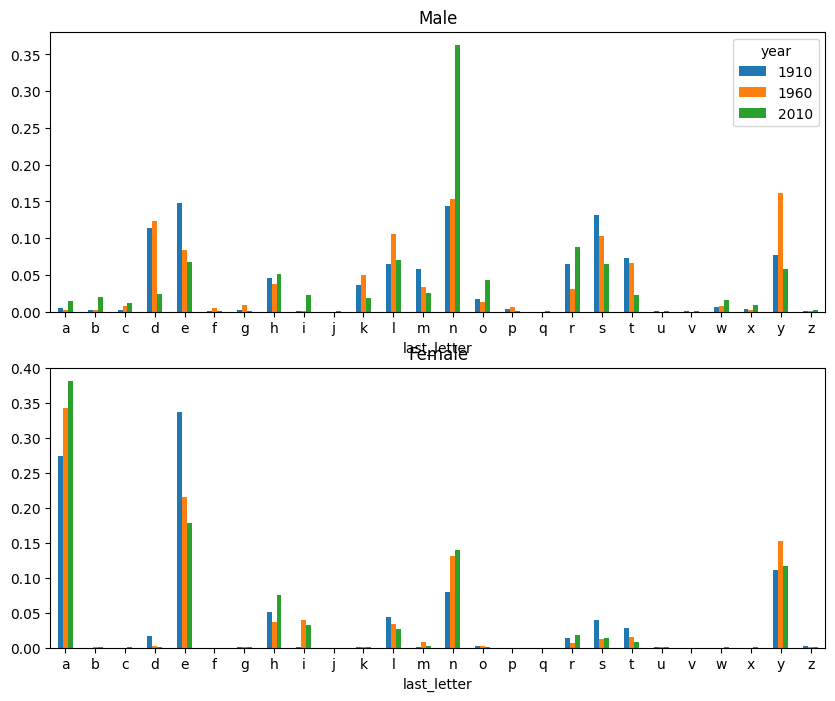

In [132]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(
    kind="bar", rot=0, ax=axes[1], title="Female", legend=False
);


In [133]:
letter_prop = table / table.sum()


In [134]:
dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T


In [135]:
dny_ts.head()


last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


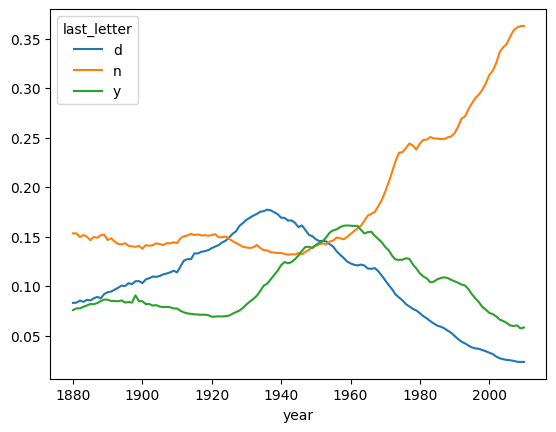

In [136]:
dny_ts.plot();


#### Nome de meninos que se tornaram nome de meninas (e vice-versa)

In [137]:
all_names = pd.Series(top1000["name"].unique())


In [138]:
lesley_like = all_names[all_names.str.contains("Lesl")]


In [139]:
lesley_like


654     Leslie
2307    Lesley
4257    Leslee
4725     Lesli
6096     Lesly
dtype: object

In [140]:
filtered = top1000[top1000["name"].isin(lesley_like)]


In [141]:
filtered.groupby("name")["births"].sum()


name
Leslee       993
Lesley     35009
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [142]:
table = filtered.pivot_table(
    "births", index="year", columns="sex", aggfunc="sum"
)


In [143]:
table = table.div(table.sum(axis="columns"), axis="index")


In [144]:
table.tail()


sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


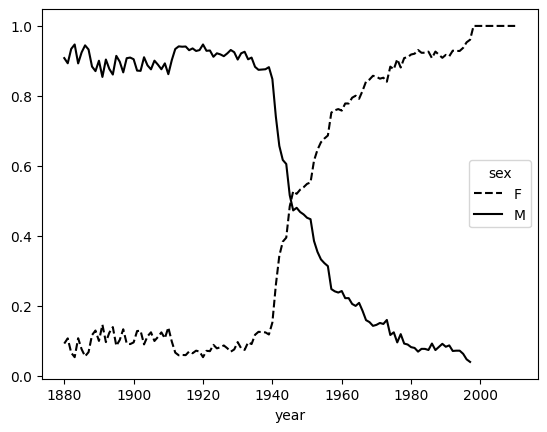

In [145]:
table.plot(style={"M": "k-", "F": "k--"});


## 13.4 Banco de dados de alimentos do USDA

In [ ]:
import json


In [147]:
db = json.load(open("datasets/usda_food/database.json"))


In [ ]:
len(db)


6636

In [ ]:
db[0].keys()


dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [ ]:
db[0]["nutrients"][0]


{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [151]:
nutrients = pd.DataFrame(db[0]["nutrients"])


In [ ]:
nutrients.head(7)


,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


In [ ]:
info_keys = ["description", "group", "id", "manufacturer"]


In [154]:
info = pd.DataFrame(db, columns=info_keys)


In [ ]:
info.head()


,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [ ]:
info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [ ]:
pd.value_counts(info["group"])[:10]


C:\Users\derek\AppData\Local\Temp\ipykernel_16024\3634668934.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(info["group"])[:10]


group
Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: count, dtype: int64

In [158]:
nutrients = []
for rec in db:
    fnuts = pd.DataFrame(rec["nutrients"])
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)


In [ ]:
nutrients


,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [160]:
nutrients.duplicated().sum()  # número de duplicidades


np.int64(14179)

In [161]:
nutrients = nutrients.drop_duplicates()


In [162]:
col_mapping = {"description": "food", "group": "fgroup"}


In [163]:
info = info.rename(columns=col_mapping, copy=False)


In [ ]:
info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [165]:
col_mapping = {"description": "nutrient", "group": "nutgroup"}


In [166]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)


In [ ]:
nutrients


,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [168]:
ndata = pd.merge(nutrients, info, on="id")


In [ ]:
ndata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 22.9+ MB


In [ ]:
ndata.iloc[30000]


value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [171]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)


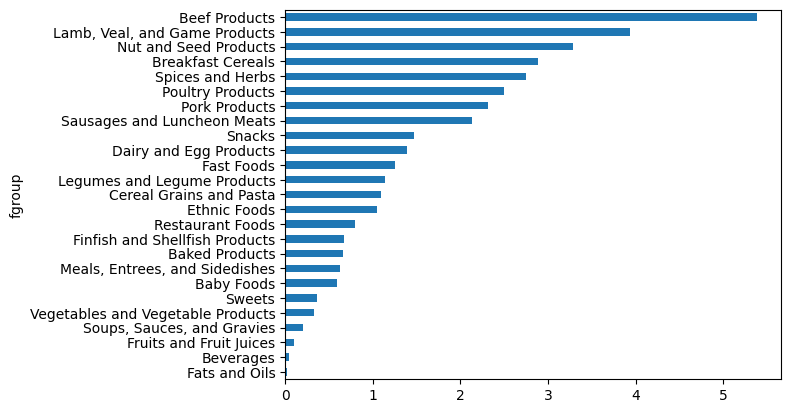

In [173]:
result["Zinc, Zn"].sort_values().plot(kind="barh");


In [174]:
by_nutrient = ndata.groupby(["nutgroup", "nutrient"])


def get_maximum(x):
    return x.loc[x.value.idxmax()]


max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]

# diminui o tamanho da string do alimento
max_foods["food"] = max_foods["food"].str[:50]


C:\Users\derek\AppData\Local\Temp\ipykernel_16024\2771935464.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]


In [ ]:
max_foods.loc["Amino Acids"]["food"]


nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

## 13.5 Banco de dados da Federal Election Commission em 2012

In [176]:
fec = pd.read_csv("datasets/fec/P00000001-ALL.csv", low_memory=False)


In [ ]:
fec.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [ ]:
fec.iloc[123456]


cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                        50.0
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [ ]:
unique_cands = fec["cand_nm"].unique()


In [ ]:
unique_cands


array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [182]:
unique_cands[2]


'Obama, Barack'

In [185]:
parties = {
    "Bachmann, Michelle": "Republican",
    "Cain, Herman": "Republican",
    "Gingrich, Newt": "Republican",
    "Huntsman, Jon": "Republican",
    "Johnson, Gary Earl": "Republican",
    "McCotter, Thaddeus G": "Republican",
    "Obama, Barack": "Democrat",
    "Paul, Ron": "Republican",
    "Pawlenty, Timothy": "Republican",
    "Perry, Rick": "Republican",
    "Roemer, Charles E. 'Buddy' III": "Republican",
    "Romney, Mitt": "Republican",
    "Santorum, Rick": "Republican",
}


In [186]:
fec["cand_nm"][123456:123461]


123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [ ]:
fec["cand_nm"][123456:123461].map(parties)


123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [188]:
fec["party"] = fec["cand_nm"].map(parties)


In [ ]:
fec["party"].value_counts()


party
Democrat      593746
Republican    407985
Name: count, dtype: int64

In [190]:
(fec["contb_receipt_amt"] > 0).value_counts()


contb_receipt_amt
True     991475
False     10256
Name: count, dtype: int64

In [191]:
fec = fec[fec["contb_receipt_amt"] > 0]


In [192]:
fec_mrbo = fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]


### Estatísticas de doações por profissão e empregador

In [ ]:
fec["contbr_occupation"].value_counts()[:10]


contbr_occupation
RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: count, dtype: int64

In [199]:
occ_mapping = {
    "INFORMATION REQUESTED PER BEST EFFORTS": "NOT PROVIDED",
    "INFORMATION REQUESTED": "NOT PROVIDED",
    "INFORMATION REQUESTED (BEST EFFORTS)": "NOT PROVIDED",
    "C.E.O.": "CEO",
}


def get_occ(x):
    # Se nenhum mapeamento for fornecido, retorna x
    return occ_mapping.get(x, x)


fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)


In [200]:
emp_mapping = {
    "INFORMATION REQUESTED PER BEST EFFORTS": "NOT PROVIDED",
    "INFORMATION REQUESTED": "NOT PROVIDED",
    "SELF": "SELF-EMPLOYED",
    "SELF-EMPLOYED": "SELF-EMPLOYED",
}


def get_emp(x):
    # Se nenhum mapeamento for fornecido, retorna x
    return emp_mapping.get(x, x)


fec["contbr_employer"] = fec["contbr_employer"].map(get_emp)


In [201]:
by_occupation = fec.pivot_table(
    "contb_receipt_amt",
    index="contbr_occupation",
    columns="party",
    aggfunc="sum",
)


In [202]:
over_2mm = by_occupation[by_occupation.sum(axis="columns") > 2000000]


In [203]:
over_2mm


party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2075974.79,4233741.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32
MANAGER,762883.22,1444532.37


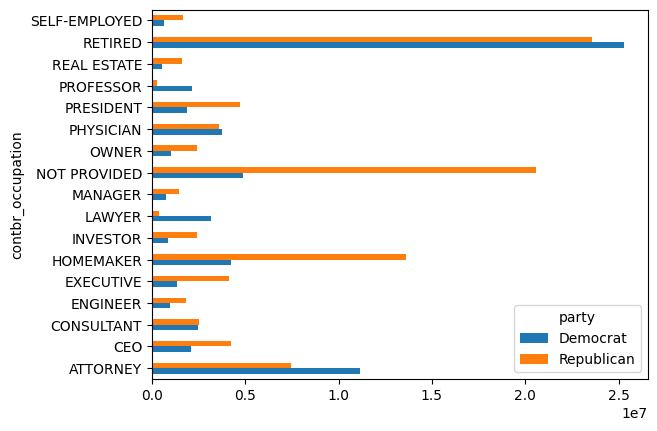

In [205]:
over_2mm.plot(kind="barh");


In [206]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)["contb_receipt_amt"].sum()
    return totals.nlargest(n)


In [ ]:
grouped = fec_mrbo.groupby("cand_nm")


In [208]:
grouped.apply(get_top_amounts, "contbr_occupation", n=7)


C:\Users\derek\AppData\Local\Temp\ipykernel_16024\1466802889.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(get_top_amounts, "contbr_occupation", n=7)


cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [209]:
grouped.apply(get_top_amounts, "contbr_employer", n=10)


C:\Users\derek\AppData\Local\Temp\ipykernel_16024\940653075.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(get_top_amounts, "contbr_employer", n=10)


cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

### Separando os valores das doações em buckets

In [210]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100_000, 1_000_000, 10_000_000])


In [211]:
labels = pd.cut(fec_mrbo["contb_receipt_amt"], bins)


In [ ]:
labels


411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [213]:
grouped = fec_mrbo.groupby(["cand_nm", labels])


C:\Users\derek\AppData\Local\Temp\ipykernel_16024\2343096985.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = fec_mrbo.groupby(["cand_nm", labels])


In [ ]:
grouped.size().unstack(level=0)


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [215]:
bucket_sums = grouped["contb_receipt_amt"].sum().unstack(level=0)


In [217]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis="columns"), axis="index")


In [ ]:
normed_sums


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,0.000000
"(1000000, 10000000]",1.000000,0.000000


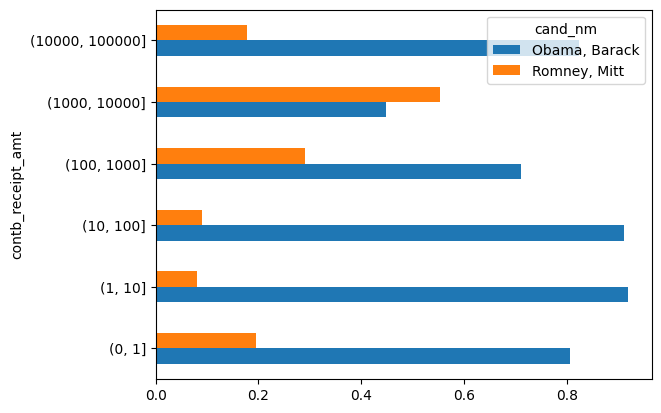

In [ ]:
normed_sums[:-2].plot(kind="barh");


### Estatísticas das doações por estado

In [221]:
grouped = fec_mrbo.groupby(["cand_nm", "contbr_st"])


In [222]:
totals = grouped["contb_receipt_amt"].sum().unstack(level=0).fillna(0)


In [223]:
totals = totals[totals.sum(axis="columns") > 100000]


In [ ]:
totals.head(10)


cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [225]:
percent = totals.div(totals.sum(axis="columns"), axis="index")


In [ ]:
percent.head(10)


cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
